## Data Exploration, Cleaning, and Analysis

This section involves loading historical stock data from Yahoo Finance and inspecting its structure. The data is cleaned by making sure there are no missing values and ensuring the correct formats. 

Exploratory Data Analysis (EDA) is performed, including visualizing stock price trends, calculating daily returns, analyzing correlations, and assessing key financial metrics such as cumulative returns and volatility. 

These steps help identify important patterns and trends in the semiconductor industry from 2015 to 2023.


### Load and Inspect the Data

This section loads the stock data from the CSV file, inspects the structure, and checks for missing values. 

Additionally, the 'Date' column is converted to the proper datetime format.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
data = pd.read_csv('semiconductor_stock_data.csv')

# Inspect the first 10 rows of the data
print(data.head(10))


         Date      NVDA       INTC   AMD       QCOM        TSM
0  2015-01-02  0.483177  27.896463  2.67  55.841820  16.909441
1  2015-01-05  0.475016  27.581898  2.66  55.578712  16.499603
2  2015-01-06  0.460614  27.067846  2.63  54.789341  16.211205
3  2015-01-07  0.459414  27.635607  2.58  55.428360  16.446474
4  2015-01-08  0.476696  28.149651  2.61  56.014748  16.552731
5  2015-01-09  0.478616  28.203344  2.63  55.947067  16.089775
6  2015-01-12  0.472616  28.080589  2.63  55.308064  15.778603
7  2015-01-13  0.471895  28.003868  2.66  54.857006  15.975929
8  2015-01-14  0.473816  27.888784  2.63  54.293179  15.983519
9  2015-01-15  0.470455  27.766020  2.52  53.661690  17.372400


In [3]:
# Check the structure and data types
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2264 entries, 0 to 2263
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2264 non-null   object 
 1   NVDA    2264 non-null   float64
 2   INTC    2264 non-null   float64
 3   AMD     2264 non-null   float64
 4   QCOM    2264 non-null   float64
 5   TSM     2264 non-null   float64
dtypes: float64(5), object(1)
memory usage: 106.2+ KB
None


**No Missing Data:**

From the result above the "Non-Null Count" for all columns, including Date, is 2264, which matches the total number of entries (rows). This means there are no missing values in any of the columns.

**Date Column Format:**

The Date column has a data type of object, which indicates that the Date column is currently stored as a string (text) rather than a proper datetime format. To ensure the Date column is in the correct format, we should convert it to datetime using the following code

In [4]:
# Convert 'Date' column to datetime if necessary
if 'Date' in data.columns:
    data['Date'] = pd.to_datetime(data['Date'])

# Checking if the 'Date' converted
print(data.info())    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2264 entries, 0 to 2263
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2264 non-null   datetime64[ns]
 1   NVDA    2264 non-null   float64       
 2   INTC    2264 non-null   float64       
 3   AMD     2264 non-null   float64       
 4   QCOM    2264 non-null   float64       
 5   TSM     2264 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 106.2 KB
None


In [5]:
# Set 'Date' as index
data.set_index('Date', inplace=True)

#Printing data to make sure it looks as expected 
print(data.head(5))

                NVDA       INTC   AMD       QCOM        TSM
Date                                                       
2015-01-02  0.483177  27.896463  2.67  55.841820  16.909441
2015-01-05  0.475016  27.581898  2.66  55.578712  16.499603
2015-01-06  0.460614  27.067846  2.63  54.789341  16.211205
2015-01-07  0.459414  27.635607  2.58  55.428360  16.446474
2015-01-08  0.476696  28.149651  2.61  56.014748  16.552731


### Visualise Stock Price Trends

This section plots stock price trends over time using the adjusted close prices, helping to observe overall movements and fluctuations.


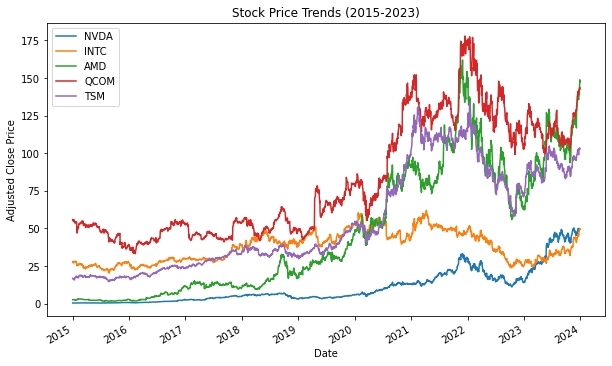

In [6]:
# Visualise stock price trends over time
data.plot(figsize=(10, 6))
plt.title('Stock Price Trends (2015-2023)')
plt.ylabel('Adjusted Close Price')
plt.xlabel('Date')
plt.show()

### Calculate and Visualise Daily Returns

This section calculates daily returns for each stock to show day-to-day percentage changes. A plot is generated to view stock volatility.


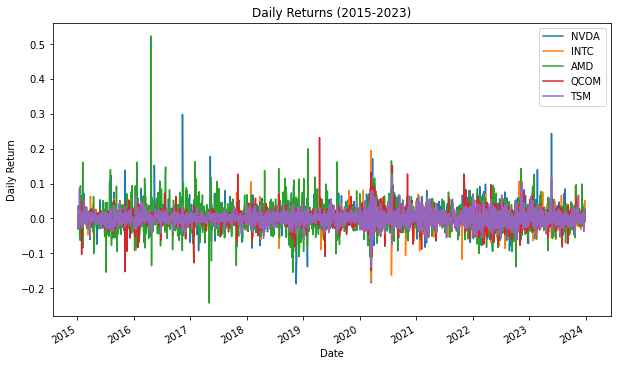

In [7]:
# Calculate daily returns
returns = data.pct_change()

# Plot daily returns
returns.plot(figsize=(10, 6))
plt.title('Daily Returns (2015-2023)')
plt.ylabel('Daily Return')
plt.xlabel('Date')
plt.show()


### Analyse Correlation Between Stocks

This section calculates the correlation between stock returns for different companies. A heatmap is used to visualise how the stocks move in relation to each other.


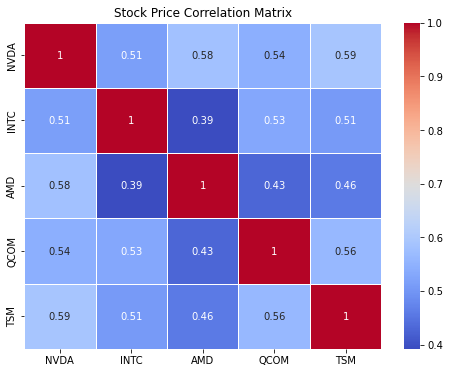

In [8]:
# Compute correlation between stock returns
corr_matrix = returns.corr()

# Plot heatmap of correlations
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Stock Price Correlation Matrix')
plt.show()


### Calculate and Plot Cumulative Returns

Cumulative returns are calculated for each stock to see the total return over time, assuming the investment was held throughout the period. This helps assess the overall performance of each stock.


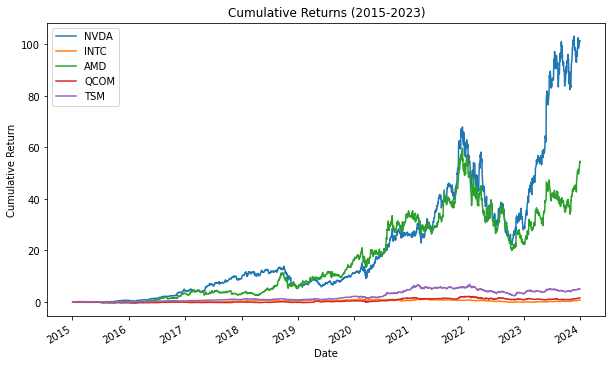

In [9]:
# Calculate cumulative returns
cumulative_returns = (1 + returns).cumprod() - 1

# Plot cumulative returns
cumulative_returns.plot(figsize=(10, 6))
plt.title('Cumulative Returns (2015-2023)')
plt.ylabel('Cumulative Return')
plt.xlabel('Date')
plt.show()

### Assess Rolling Volatility

This section calculates rolling volatility using a 30-day rolling standard deviation of daily returns. The rolling volatility is plotted to observe periods of higher or lower volatility over time.


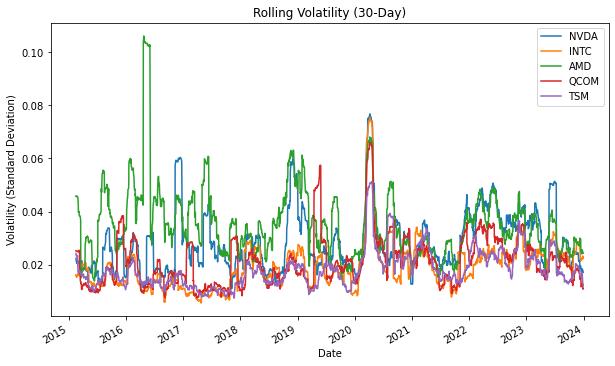

In [10]:
# Calculate rolling volatility (e.g., 30-day rolling standard deviation)
volatility = returns.rolling(window=30).std()

# Plot rolling volatility
volatility.plot(figsize=(10, 6))
plt.title('Rolling Volatility (30-Day)')
plt.ylabel('Volatility (Standard Deviation)')
plt.xlabel('Date')
plt.show()
